In [14]:
%pylab inline
import networkx as nx

import cv2
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


error: /home/travis/miniconda/conda-bld/conda_1486587069159/work/opencv-3.1.0/modules/imgproc/src/thresh.cpp:161: error: (-5) Unknown threshold type in function thresh_8u


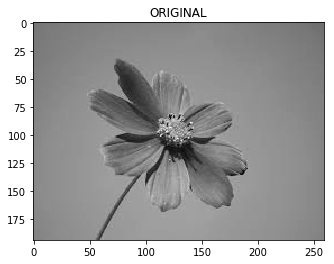

In [15]:
img1 = cv2.imread('flower.jpeg',0)
plt.imshow(img1,'gray'),plt.title('ORIGINAL')
img1 = cv2.threshold(img1, 0, 100, 255)
plt.imshow(img1,'gray'),plt.title('ORIGINAL')

In [4]:
#Building the graph
print(img1.shape[0]*img1.shape[1])
b = 8
Gimg2 = nx.DiGraph()

for i in range(1,img1.shape[0]-1):
    for j in range(1,img1.shape[1]-1):
        Gimg2.add_edge(b, b-7 , weight = np.abs( int(img1[i-1,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b-6 , weight = np.abs( int(img1[i-1,j]) - img1[i,j]) )
        Gimg2.add_edge(b, b-5 , weight = np.abs( int(img1[i-1,j+1]) - img1[i,j]) )
        
        Gimg2.add_edge(b, b-1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b+1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )
        
        Gimg2.add_edge(b, b+5 , weight = np.abs( int(img1[i+1,j-1]) - img1[i,j]) )
        Gimg2.add_edge(b, b+6 , weight = np.abs( int(img1[i+1,j]) - img1[i,j]) )
        Gimg2.add_edge(b, b+7 , weight = np.abs( int(img1[i+1,j+1]) - img1[i,j]) )
        b = b + 1
nx.write_pajek(Gimg2, "test_nocond.net")

50246


In [5]:
#measures
from networkx.algorithms import approximation as approx
print(approx.local_node_connectivity(Gimg2, 8, 40000))
print(nx.degree_assortativity_coefficient(Gimg2))
#print(nx.average_neighbor_degree(Gimg2))
#print(nx.degree_centrality(Gimg2))
#print(nx.clustering(Gimg2))
print(nx.average_clustering(Gimg2))

4


/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


nan
0.42861175445861227


In [8]:
#Building the graph
print(img1.shape[0]*img1.shape[1])
b = 8
Gimg2 = nx.DiGraph()

for i in range(1,img1.shape[0]-1):
    for j in range(1,img1.shape[1]-1):
        if np.abs( int(img1[i-1,j-1]) - img1[i,j]) > int(img1[i-1,j-1]*0.1) :
            Gimg2.add_edge(b, b-7 , weight = np.abs( int(img1[i-1,j-1]) - img1[i,j]) )
        #print(np.abs( int(img1[i-1,j-1]) - img1[i,j]))
            
        if np.abs( int(img1[i-1,j]) - img1[i,j])   > int(img1[i-1,j]*0.1) :
            Gimg2.add_edge(b, b-6 , weight = np.abs( int(img1[i-1,j]) - img1[i,j]) )
            
        if np.abs( int(img1[i-1,j+1]) - img1[i,j]) > int(img1[i-1,j+1]*0.1) :
            Gimg2.add_edge(b, b-5 , weight = np.abs( int(img1[i-1,j+1]) - img1[i,j]) )
            
        if np.abs( int(img1[i,j-1]) - img1[i,j])   > int(img1[i,j-1]*0.1) :
            Gimg2.add_edge(b, b-1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )
            
        if np.abs( int(img1[i,j+1]) - img1[i,j])   > int(img1[i,j+1]*0.1) :
            Gimg2.add_edge(b, b+1 , weight = np.abs( int(img1[i,j+1]) - img1[i,j]) )
            
        if np.abs( int(img1[i+1,j-1]) - img1[i,j]) > int(img1[i+1,j-1]*0.1) :
            Gimg2.add_edge(b, b+5 , weight = np.abs( int(img1[i+1,j-1]) - img1[i,j]) )
            
        if np.abs( int(img1[i+1,j]) - img1[i,j])   > int(img1[i+1,j]*0.1) :
            Gimg2.add_edge(b, b+6 , weight = np.abs( int(img1[i+1,j]) - img1[i,j]) )
            
        if np.abs( int(img1[i+1,j+1]) - img1[i,j]) > int(img1[i+1,j+1]*0.1) :
            Gimg2.add_edge(b, b+7 , weight = np.abs( int(img1[i+1,j+1]) - img1[i,j]) )
        b = b + 1
nx.write_pajek(Gimg2, "test_cond" + str(1) + ".net")
print(Gimg2.size)

50246
<bound method Graph.size of <networkx.classes.digraph.DiGraph object at 0x7f1c06eb9208>>


In [7]:
ls

00001.jpg                                  OpenCvTesting.ipynb
Ambiental_Datos.ipynb                      plot_pca_vs_lda.ipynb
archivo.ipynb                              positive/
CancerBreast Classification.ipynb          prueba_2.csv
chess_legends.png                          setup.py
Comparison Classifiers Step by Step.ipynb  SignalProc+DL.ipynb
Comparison Classififers Summary.ipynb      Simple GA.ipynb
Consumer_Complaints.csv                    sp_dl.py
Consumer_complaints.ipynb                  test_cond.net
data_wine.csv                              testfile.txt
datos_ambiental.csv                        test.net
Desercion.ipynb                            testp.net
Diego/                                     Train/
dtree2.dot                                 train.csv
flower.jpeg                                Untitled1.ipynb
How to Compare Classifiers.ipynb           Untitled2.ipynb
Image_test.ipynb                           Untitled3.ipynb
mi_arbol.dot                           

In [16]:
import os
files = []

for i in os.listdir('./negative/'):
    if i.endswith('.jpg'):
        files.append(i)
        print(i)
# do what you want with all these open files
print(type(files[0]))

images = []
#file = open('testfile.txt','w') 
nn = 0
for e in files:
    img1 = cv2.imread('./negative/'+e,0)
    img1 = cv2.bilateralFilter(img1,9,75,75)

    b = 0
    Gimg2 = nx.DiGraph()
    
    print(img1.shape)

    for i in range(1,img1.shape[0]-1):
        for j in range(1,img1.shape[1]-1):
            if np.abs( int(img1[i-1,j-1]) - img1[i,j]) > int(img1[i-1,j-1]*0.1) :
                Gimg2.add_edge(b, b-7 , weight = np.abs( int(img1[i-1,j-1]) - img1[i,j]) )
            #print(np.abs( int(img1[i-1,j-1]) - img1[i,j]))

            if np.abs( int(img1[i-1,j]) - img1[i,j])   > int(img1[i-1,j]*0.1) :
                Gimg2.add_edge(b, b-6 , weight = np.abs( int(img1[i-1,j]) - img1[i,j]) )

            if np.abs( int(img1[i-1,j+1]) - img1[i,j]) > int(img1[i-1,j+1]*0.1) :
                Gimg2.add_edge(b, b-5 , weight = np.abs( int(img1[i-1,j+1]) - img1[i,j]) )

            if np.abs( int(img1[i,j-1]) - img1[i,j])   > int(img1[i,j-1]*0.1) :
                Gimg2.add_edge(b, b-1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )

            if np.abs( int(img1[i,j+1]) - img1[i,j])   > int(img1[i,j+1]*0.1) :
                Gimg2.add_edge(b, b+1 , weight = np.abs( int(img1[i,j+1]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j-1]) - img1[i,j]) > int(img1[i+1,j-1]*0.1) :
                Gimg2.add_edge(b, b+5 , weight = np.abs( int(img1[i+1,j-1]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j]) - img1[i,j])   > int(img1[i+1,j]*0.1) :
                Gimg2.add_edge(b, b+6 , weight = np.abs( int(img1[i+1,j]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j+1]) - img1[i,j]) > int(img1[i+1,j+1]*0.1) :
                Gimg2.add_edge(b, b+7 , weight = np.abs( int(img1[i+1,j+1]) - img1[i,j]) )
            b = b + 1
    nn = nn + 1
            
    nx.write_pajek(Gimg2, 'net_neg_' + str(nn) + '.net')
    
    #file.write(str(nx.degree_assortativity_coefficient(Gimg2))+',')
    #file.write(str(nx.average_clustering(Gimg2))+'\n')
    #images.append(img)
#file.close() 

00002.jpg
00004.jpg
00001.jpg
00003.jpg
00005.jpg
<class 'str'>
(227, 227)
(227, 227)
(227, 227)
(227, 227)
(227, 227)


In [ ]:
plt.subplot(231),plt.imshow(images[0],'gray')
plt.subplot(232),plt.imshow(images[1],'gray')
plt.subplot(233),plt.imshow(images[2],'gray')
plt.subplot(234),plt.imshow(images[3],'gray')
plt.subplot(235),plt.imshow(images[4],'gray')
plt.subplot(236),plt.imshow(images[5],'gray')

In [17]:
import os
files = []

for i in os.listdir('./positive/'):
    if i.endswith('.jpg'):
        files.append(i)
        print(i)
# do what you want with all these open files
print(type(files[0]))

images = []
#file = open('testfile.txt','w') 
nn = 0
for e in files:
    img1 = cv2.imread('./positive/'+e,0)
    img1 = cv2.bilateralFilter(img1,9,75,75)

    b = 0
    Gimg2 = nx.DiGraph()
    
    print(img1.shape)

    for i in range(1,img1.shape[0]-1):
        for j in range(1,img1.shape[1]-1):
            if np.abs( int(img1[i-1,j-1]) - img1[i,j]) > int(img1[i-1,j-1]*0.1) :
                Gimg2.add_edge(b, b-7 , weight = np.abs( int(img1[i-1,j-1]) - img1[i,j]) )
            #print(np.abs( int(img1[i-1,j-1]) - img1[i,j]))

            if np.abs( int(img1[i-1,j]) - img1[i,j])   > int(img1[i-1,j]*0.1) :
                Gimg2.add_edge(b, b-6 , weight = np.abs( int(img1[i-1,j]) - img1[i,j]) )

            if np.abs( int(img1[i-1,j+1]) - img1[i,j]) > int(img1[i-1,j+1]*0.1) :
                Gimg2.add_edge(b, b-5 , weight = np.abs( int(img1[i-1,j+1]) - img1[i,j]) )

            if np.abs( int(img1[i,j-1]) - img1[i,j])   > int(img1[i,j-1]*0.1) :
                Gimg2.add_edge(b, b-1 , weight = np.abs( int(img1[i,j-1]) - img1[i,j]) )

            if np.abs( int(img1[i,j+1]) - img1[i,j])   > int(img1[i,j+1]*0.1) :
                Gimg2.add_edge(b, b+1 , weight = np.abs( int(img1[i,j+1]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j-1]) - img1[i,j]) > int(img1[i+1,j-1]*0.1) :
                Gimg2.add_edge(b, b+5 , weight = np.abs( int(img1[i+1,j-1]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j]) - img1[i,j])   > int(img1[i+1,j]*0.1) :
                Gimg2.add_edge(b, b+6 , weight = np.abs( int(img1[i+1,j]) - img1[i,j]) )

            if np.abs( int(img1[i+1,j+1]) - img1[i,j]) > int(img1[i+1,j+1]*0.1) :
                Gimg2.add_edge(b, b+7 , weight = np.abs( int(img1[i+1,j+1]) - img1[i,j]) )
            b = b + 1
    nn = nn + 1
            
    nx.write_pajek(Gimg2, 'net_pos_' + str(nn) + '.net')
    
    #file.write(str(nx.degree_assortativity_coefficient(Gimg2))+',')
    #file.write(str(nx.average_clustering(Gimg2))+'\n')
    #images.append(img)
#file.close() 

00002.jpg
00004.jpg
00001.jpg
00003.jpg
00005.jpg
<class 'str'>
(227, 227)
(227, 227)
(227, 227)
(227, 227)
(227, 227)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2679dc2d68>,
 <matplotlib.image.AxesImage at 0x7f2679d19b38>)

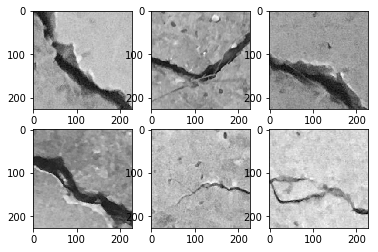

In [74]:
plt.subplot(231),plt.imshow(images[0],'gray')
plt.subplot(232),plt.imshow(images[1],'gray')
plt.subplot(233),plt.imshow(images[2],'gray')
plt.subplot(234),plt.imshow(images[3],'gray')
plt.subplot(235),plt.imshow(images[4],'gray')
plt.subplot(236),plt.imshow(images[5],'gray')

In [ ]:
file = open('testfile.txt','w') 
 
file.write('Hello World') 
file.write('This is our new text file') 
file.write('and this is another line.') 
file.write('Why? Because we can.') 
 
file.close() 

In [81]:
ls

Ambiental_Datos.ipynb                      OpenCV + NetworkX.ipynb
archivo.ipynb                              OpenCvTesting.ipynb
CancerBreast Classification.ipynb          plot_pca_vs_lda.ipynb
Comparison Classifiers Step by Step.ipynb  Positive/
Comparison Classififers Summary.ipynb      prueba_2.csv
Consumer_Complaints.csv                    setup.py
Consumer_complaints.ipynb                  SignalProc+DL.ipynb
data_wine.csv                              Simple GA.ipynb
datos_ambiental.csv                        sp_dl.py
Desercion.ipynb                            testfile.txt
Diego/                                     Train/
dtree2.dot                                 train.csv
flower.jpeg                                Untitled1.ipynb
How to Compare Classifiers.ipynb           Untitled2.ipynb
Image_test.ipynb                           Untitled3.ipynb
mi_arbol.dot                               Untitled4.ipynb
negative/                                  Untitled.ipynb
NetworkX Testing.

area:1
k:0.03162277660168379
t:0.1, dt:0.00196078431372549
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
iter 20
iter 21
iter 22
iter 23
iter 24
iter 25
iter 26
iter 27
iter 28
iter 29
iter 30
iter 31
iter 32
iter 33
iter 34
iter 35
iter 36
iter 37
iter 38
iter 39
iter 40
iter 41
iter 42
iter 43
iter 44
iter 45
iter 46
iter 47
iter 48
iter 49


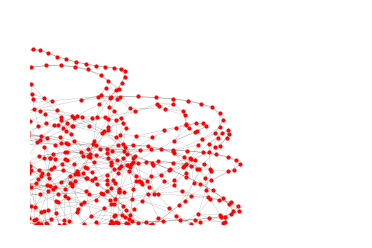

In [12]:
#https://gist.github.com/mmisono/8972731
import networkx as nx
import matplotlib.pyplot as plt
import math
from random import random
from numpy import arange

N = 1000
K = 5
P = 0.05

# attractive force
def f_a(d,k):
    return d*d/k

# repulsive force
def f_r(d,k):
    return k*k/d

def fruchterman_reingold(G,iteration=50):
    W = 1
    L = 1
    area = W*L
    k = math.sqrt(area/nx.number_of_nodes(G))

    # initial position
    for v in nx.nodes(G):
        G.node[v]['x'] = W*random()
        G.node[v]['y'] = L*random()


    t = W/10
    dt = t/(iteration+1)

    print("area:{0}".format(area))
    print("k:{0}".format(k))
    print("t:{0}, dt:{1}".format(t,dt))

    for i in range(iteration):
        print("iter {0}".format(i))

        pos = {}
        for v in G.nodes():
            pos[v] = [G.node[v]['x'],G.node[v]['y']]
        plt.close()
        plt.ylim([-0.1,1.1])
        plt.xlim([-0.1,1.1])
        plt.axis('off')
        nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)
        plt.savefig("0.png".format(i))

        # calculate repulsive forces
        for v in G.nodes():
            G.node[v]['dx'] = 0
            G.node[v]['dy'] = 0
            for u in G.nodes():
                if v != u:
                    dx = G.node[v]['x'] - G.node[u]['x']
                    dy = G.node[v]['y'] - G.node[u]['y']
                    delta = math.sqrt(dx*dx+dy*dy)
                    if delta != 0:
                        d = f_r(delta,k)/delta
                        G.node[v]['dx'] += dx*d
                        G.node[v]['dy'] += dy*d

        # calculate attractive forces
        for v,u in G.edges():
            dx = G.node[v]['x'] - G.node[u]['x']
            dy = G.node[v]['y'] - G.node[u]['y']
            delta = math.sqrt(dx*dx+dy*dy)
            if delta != 0:
                d = f_a(delta,k)/delta
                ddx = dx*d
                ddy = dy*d
                G.node[v]['dx'] += -ddx
                G.node[u]['dx'] += +ddx
                G.node[v]['dy'] += -ddy
                G.node[u]['dy'] += +ddy

        # limit the maximum displacement to the temperature t
        # and then prevent from being displace outside frame
        cnt = 0
        for v in G.nodes():
            dx = G.node[v]['dx']
            dy = G.node[v]['dy']
            disp = math.sqrt(dx*dx+dy*dy)
            if disp != 0:
                cnt += 1
                d = min(disp,t)/disp
                x = G.node[v]['x'] + dx*d
                y = G.node[v]['y'] + dy*d
                x =  min(W,max(0,x)) - W/2
                y =  min(L,max(0,y)) - L/2
                G.node[v]['x'] = min(math.sqrt(W*W/4-y*y),max(-math.sqrt(W*W/4-y*y),x)) + W/2
                G.node[v]['y'] = min(math.sqrt(L*L/4-x*x),max(-math.sqrt(L*L/4-x*x),y)) + L/2

        # cooling
        t -= dt

    pos = {}
    for v in G.nodes():
        pos[v] = [G.node[v]['x'],G.node[v]['y']]
    plt.close()
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])
    plt.axis('off')
    nx.draw_networkx(G,pos=pos,node_size=10,width=0.1,with_labels=False)
    plt.savefig("1.png".format(i+1))

    return pos

def main():
    G = nx.watts_strogatz_graph(N,K,P)
    pos = fruchterman_reingold(G)
    plt.close()
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])
    plt.axis('off')
    nx.draw_networkx(G,pos=nx.spring_layout(G),node_size=10,width=0.1,with_labels=False)
    plt.savefig("orig.png")

if __name__ == "__main__":
    main()